In [10]:
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import numpy as np

# 3. Dataset

### 3.1. Data Collection

### 3.2. Data preprocessing

##### 3.2.1 Detectors

In [ ]:
from generation.dataset.data_utils import get_attributes_df

In [11]:
colors = ['black', 'dimgray', 'lightcoral', 'maroon',
          'orangered', 'chocolate', 'tan', 'orange',
          'olive', 'yellow', 'chartreuse', 'forestgreen',
          'turquoise', 'deepskyblue', 'navy', 'mediumpurple',
          'fuchsia', 'pink']

In [12]:
df = get_attributes_df()
negative_df = df[df['z'] < 0]
detectors = set(sorted(negative_df['detector'].unique()))

In [13]:
SAMPLES_PER_DETECTOR = 10000
detector_dfs = []
for detector_num in tqdm.tqdm(detectors):
    detector_df = negative_df[negative_df['detector'] == detector_num].sample(SAMPLES_PER_DETECTOR)
    detector_dfs.append(detector_df)

100%|██████████| 9/9 [00:41<00:00,  4.57s/it]


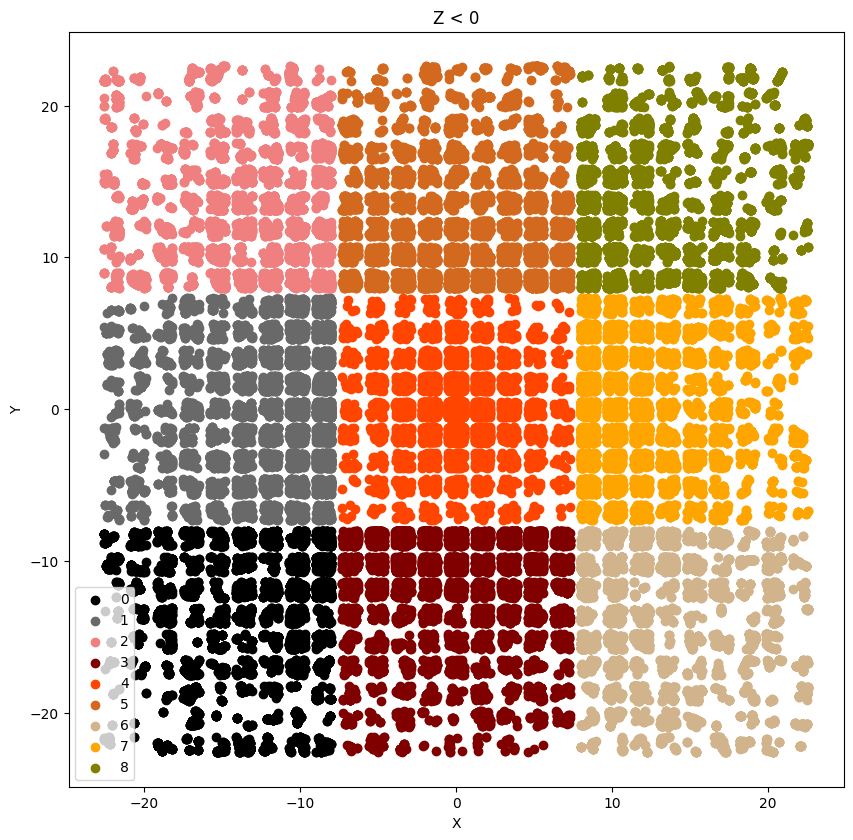

In [14]:
plt.figure(figsize=(10, 10), dpi=100)
plt.title("Z < 0")
for i, detector_df in enumerate(detector_dfs):
    x_values = detector_df['x']
    y_values = detector_df['y']
    plt.scatter(x_values, y_values, c=colors[i])
    plt.xlabel("X")
    plt.ylabel("Y")
plt.legend(detectors)
plt.show()

##### 3.2.2. Postprocessing

In [23]:
from generation.dataset.data_utils import get_event_detector_df, generate_one_signal, postprocess_signal

In [27]:
_SIGNAL_DIM = 1024
_EVENT = 0
_DETECTOR = 0

raw_signal = generate_one_signal(
    get_event_detector_df(
        event=_EVENT,
        detector=_DETECTOR
    ), 
    signal_dim=_SIGNAL_DIM
)

postprocessed_signal = postprocess_signal(raw_signal)

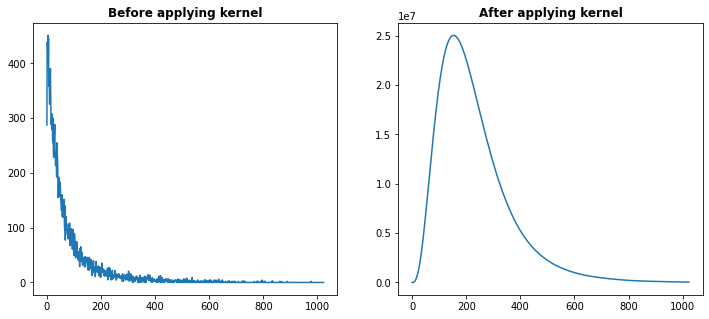

In [34]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].set_title("Before applying kernel", weight='bold')
ax[0].plot(raw_signal)
ax[1].set_title("After applying kernel", weight='bold')
ax[1].plot(postprocessed_signal)
plt.show()

### 3.3. Signal representations

# 4. Amplitudes Generative Model

### 4.1 Generator

# 5. Shapes Generative Model

In [52]:
from generation.dataset.shapes_dataset import ShapesDataset

In [53]:
shapes_dataset = ShapesDataset(detector=_DETECTOR)

/datadrive/pafakanov/hse/hep_generative_models/generation/dataset/shapes_dataset.py:54: RuntimeWarning: invalid value encountered in true_divide
  data = (data - min_values[:, None]) / (max_values - min_values)[:, None]


In [ ]:
noises = 

array([0.15709006, 0.64194832, 0.72303339, ..., 0.        , 0.        ,
       0.        ])

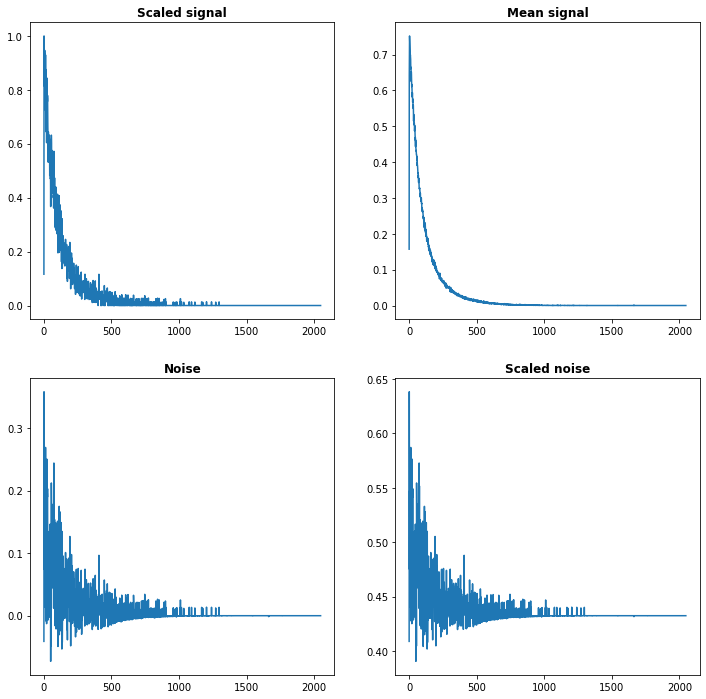

In [62]:
_idx = 0

f, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0][0].set_title("Scaled signal", weight='bold')
ax[0][0].plot(shapes_dataset.signals[_idx])

ax[0][1].set_title("Mean signal",  weight='bold')
ax[0][1].plot(np.mean(shapes_dataset.signals, axis=0))

ax[1][0].set_title("Noise",  weight='bold')
ax[1][0].plot(shapes_dataset.signals[_idx] - np.mean(shapes_dataset.signals, axis=0))

ax[1][1].set_title("Scaled noise", weight='bold')
ax[1][1].plot(shapes_dataset.noises[_idx])
plt.show()

In [46]:
norm_signals.shape

(1392, 2048)